In [1327]:
#gohil happy 
#21IM30006
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import train_test_split
import seaborn 
import seaborn as sns



In [1328]:
path = 'dataset.csv'
df = pd.read_csv(path)

In [1329]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [1330]:
df.drop(['User_ID','Product_ID'], axis = 1,inplace= True)

In [1331]:
# remove the feature which has nan values more then 50%
for features in df.columns:
    if df[features].isna().sum()/len(df)>0.5:
        df.drop(features, axis = 1)
        

In [1332]:
for feature in df.columns:
    print(f'for feature: {feature:}')
    print(f'_'*100)
    print(len(df[feature].unique()))
    print(df[feature].unique())
    print(f'_'*100)

for feature: Gender
____________________________________________________________________________________________________
2
['F' 'M']
____________________________________________________________________________________________________
for feature: Age
____________________________________________________________________________________________________
7
['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
____________________________________________________________________________________________________
for feature: Occupation
____________________________________________________________________________________________________
21
[10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
____________________________________________________________________________________________________
for feature: City_Category
____________________________________________________________________________________________________
3
['A' 'C' 'B']
____________________________________________________

In [1333]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [1334]:
df_male = df.loc[df['Gender']=='M']
df_female = df.loc[df['Gender']=='F']

<Axes: title={'center': 'male female count in data'}>

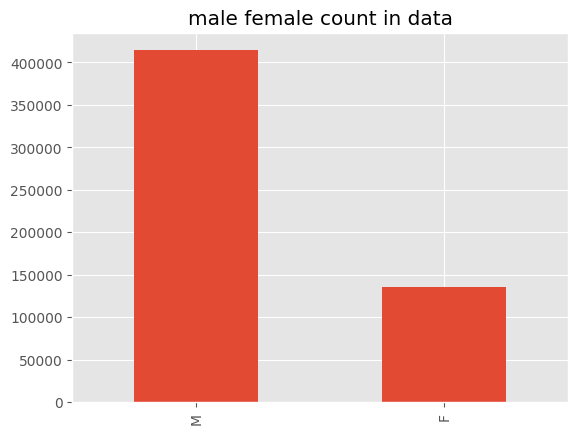

In [1335]:
df['Gender'].value_counts().plot(kind='bar',title='male female count in data')

<Axes: title={'center': 'count distribution year stayed in city wise'}, xlabel='years stayed in city', ylabel='frequancy'>

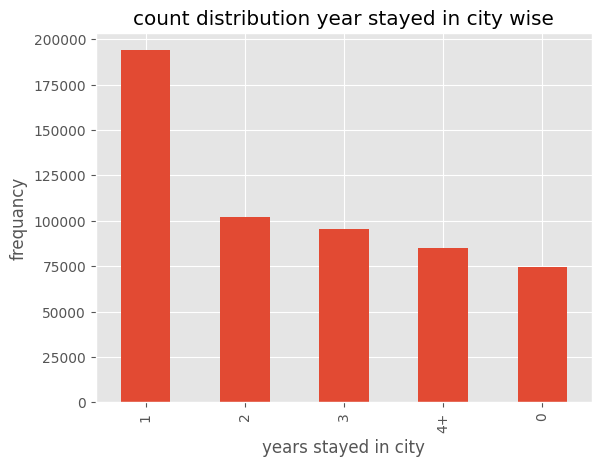

In [1336]:
df['Stay_In_Current_City_Years'].value_counts().plot(kind='bar',title='count distribution year stayed in city wise',
                                                     xlabel='years stayed in city',ylabel='frequancy')


<Axes: title={'center': 'count distribution age wise'}, xlabel='age groups', ylabel='frequancy'>

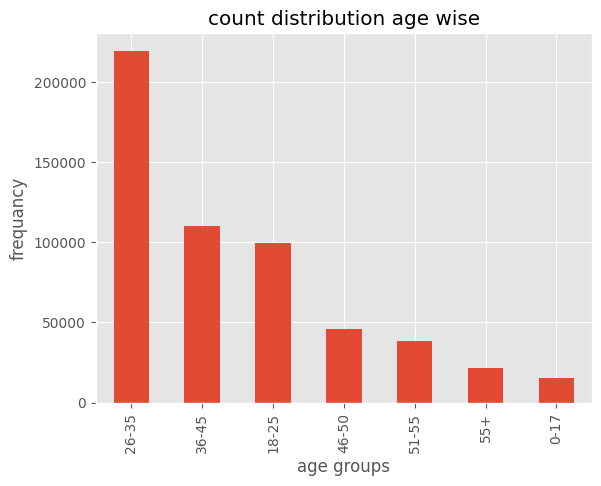

In [1337]:
df['Age'].value_counts().plot(kind='bar',title='count distribution age wise',
                                                     xlabel='age groups',ylabel='frequancy')

<Axes: title={'center': 'count distribution occupation wise'}, xlabel='occupation', ylabel='frequancy'>

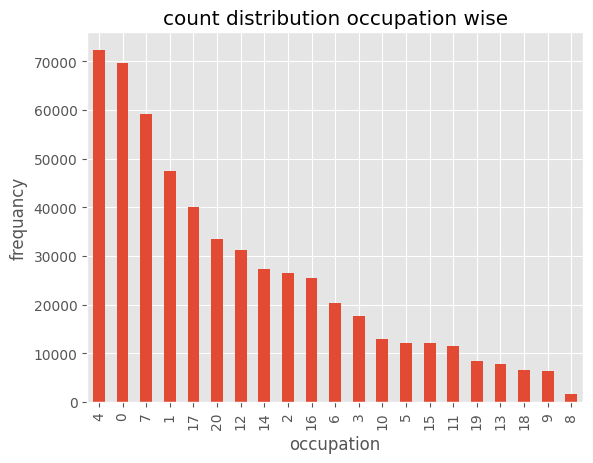

In [1338]:
df['Occupation'].value_counts().plot(kind='bar',title='count distribution occupation wise',
                                                     xlabel='occupation',ylabel='frequancy')

<Axes: title={'center': 'count distribution Product_Category_1 wise'}, xlabel='Product_Category_1', ylabel='frequancy'>

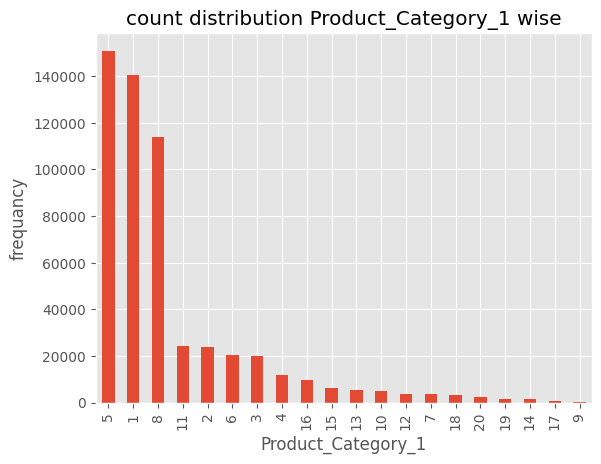

In [1339]:
df['Product_Category_1'].value_counts().plot(kind='bar',title='count distribution Product_Category_1 wise',
                                                     xlabel='Product_Category_1',ylabel='frequancy')

<Axes: title={'center': 'count distribution Product_Category_2 wise'}, xlabel='Product_Category_2', ylabel='frequancy'>

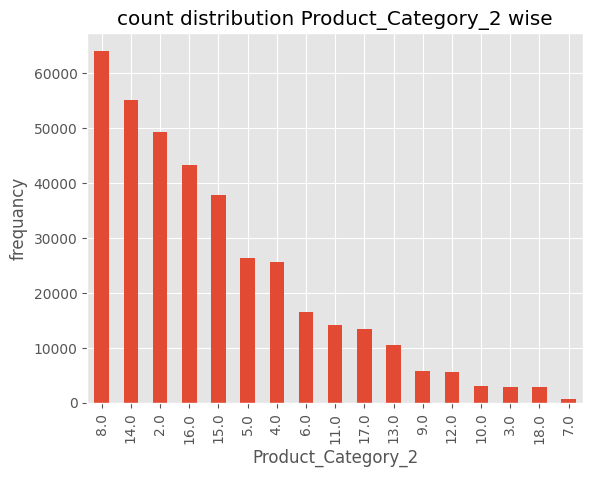

In [1340]:
df['Product_Category_2'].value_counts().plot(kind='bar',title='count distribution Product_Category_2 wise',
                                                     xlabel='Product_Category_2',ylabel='frequancy')

<Axes: title={'center': 'count distribution Marital_Status wise'}, xlabel='Marital_Status', ylabel='frequancy'>

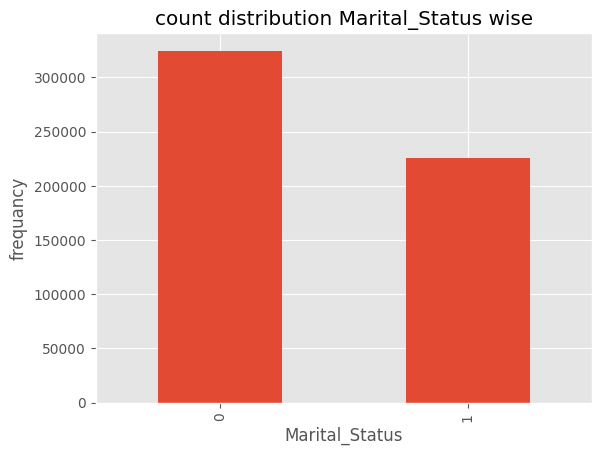

In [1341]:
df['Marital_Status'].value_counts().plot(kind='bar',title='count distribution Marital_Status wise',
                                                     xlabel='Marital_Status',ylabel='frequancy')

# Observation
1. There are less data avilabel for female or female do less shoping
2. we have more data of youngsters 
3. we observe the gradual decrese in data avilabilty of different occupation

# Purchase hist male and female

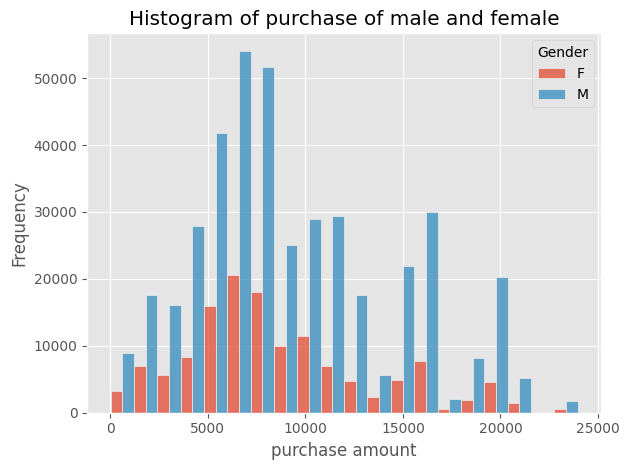

In [1342]:
df_male = df.loc[df['Gender']=='M']
plt.style.use('ggplot')
sns.histplot(x='Purchase', data = df, hue='Gender',multiple = "dodge",bins = 20,legend= True)
#plt.hist(df_male['Purchase'],color='red',bins=50,alpha = 0.5,label='Male')
#plt.hist(df_female['Purchase'],color='blue',bins=50,alpha = 0.5, label='Female')
plt.title('Histogram of purchase of male and female')
plt.xlabel('purchase amount')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## observation:
From above we can conclude that Male and female follows same kind of distrbusion with lower data avilabel for female

# **Handeling a NaN values**

In [1343]:
for feature in df.columns:
    if(df[feature].isna().sum()/len(df)>0.5):
        print(f'{feature} is droped as it had {(df[feature].isna().sum()/len(df))*100} NaN values')
        df.drop(feature, axis =1,inplace=True)


Product_Category_3 is droped as it had 69.67265865311198 NaN values


In [1344]:
df.Product_Category_2.value_counts()

8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product_Category_2, dtype: int64

from above we observe that there is not much difference in value count of 8 and 14 so using a mode to fill NaN value will not be fesibel
### So we will use forward fill

In [1345]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,F,0-17,10,A,2,0,3,NaN,8370
1,F,0-17,10,A,2,0,1,6.0,15200
2,F,0-17,10,A,2,0,12,NaN,1422
3,F,0-17,10,A,2,0,12,14.0,1057
4,M,55+,16,C,4+,0,8,NaN,7969


Filling a nan value with backward fill

In [1346]:
df['Product_Category_2'].ffill(inplace=True)
df['Product_Category_2'].bfill(inplace=True)

In [1347]:
df.Occupation.unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

# using one-hot encoding on **City_Category** and **Gender** 

In [1348]:

df = pd.get_dummies(df, columns = ['City_Category', 'Gender'],drop_first=True)

In [1349]:
df.head()

,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,City_Category_B,City_Category_C,Gender_M
0,0-17,10,2,0,3,6.0,8370,0,0,0
1,0-17,10,2,0,1,6.0,15200,0,0,0
2,0-17,10,2,0,12,6.0,1422,0,0,0
3,0-17,10,2,0,12,14.0,1057,0,0,0
4,55+,16,4+,0,8,14.0,7969,0,1,1


due to ordinal nature we can replace values of `stay_in_current_city_year` by corresponding integers

In [1350]:
df['Stay_In_Current_City_Years'].replace({'2':2, '4+':4, '3':3, '1':1, '0':0},inplace=True)

Text(0.5, 1.0, 'distribution of purchase w.r.t age')

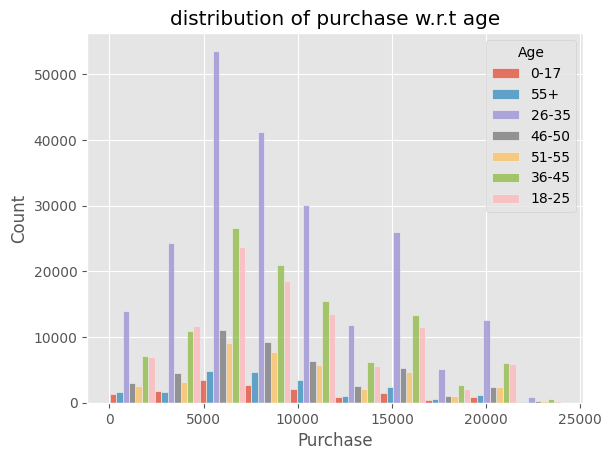

In [1351]:

sns.histplot(x = 'Purchase', hue = 'Age',
             multiple = "dodge", data= df, bins = 10)
plt.title('distribution of purchase w.r.t age')


Text(0.5, 1.0, 'distribution of purchase w.r.t year stay in city')

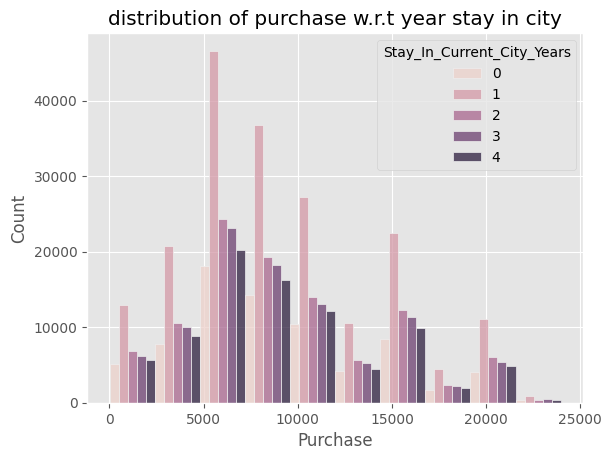

In [1352]:
sns.histplot(x = 'Purchase', hue = 'Stay_In_Current_City_Years',
             multiple = "dodge", data= df, bins = 10)
plt.title('distribution of purchase w.r.t year stay in city')

Text(0.5, 1.0, 'distribution of purchase w.r.t marital status')

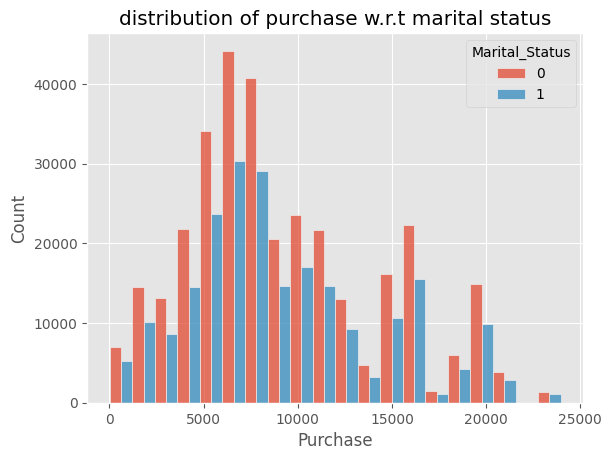

In [1353]:
sns.histplot(x = 'Purchase', hue = 'Marital_Status',
             multiple = "dodge", data= df, bins = 20)
plt.title('distribution of purchase w.r.t marital status')

Text(0.5, 1.0, 'distribution of purchase w.r.t marital status')

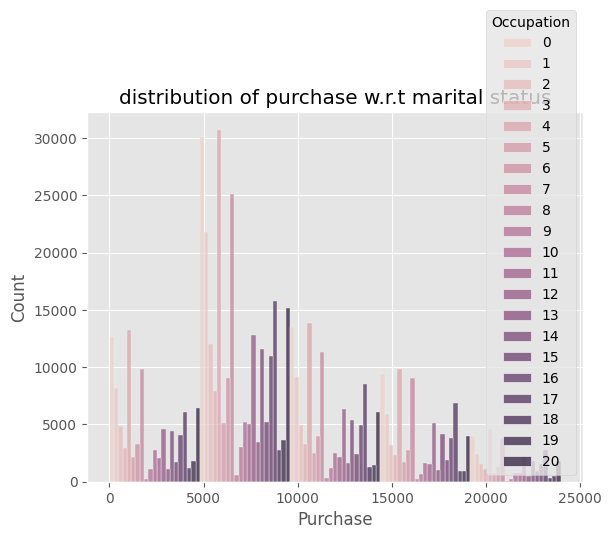

In [1354]:
sns.histplot(x = 'Purchase', hue = 'Occupation',
             multiple = "dodge", data= df, bins = 5)
plt.title('distribution of purchase w.r.t marital status')

Text(0.5, 1.0, 'distribution of purchase w.r.t marital status')

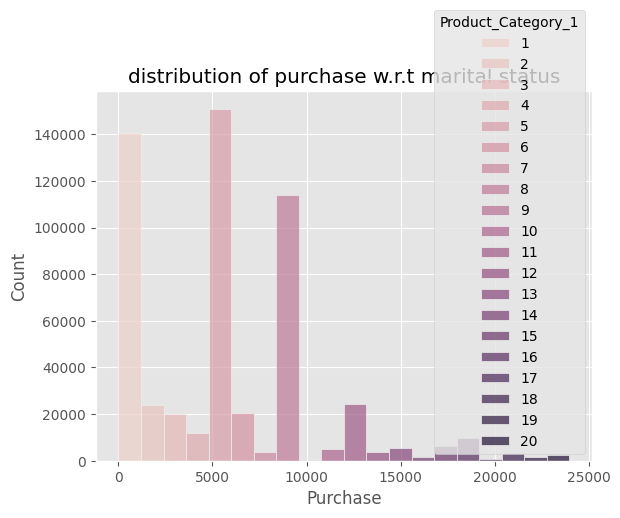

In [1355]:
sns.histplot(x = 'Purchase', hue = 'Product_Category_1',
             multiple = "dodge", data= df, bins = 1)
plt.title('distribution of purchase w.r.t marital status')

In [1356]:
df['Age'].replace({'0-17':17, '55+':56, '26-35':35, '46-50':50, '51-55':55, '36-45':45, '18-25':25},inplace=True)

In [1357]:
df.to_csv('final_preprocessed_data.csv')

In [1358]:
df.head()

,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,City_Category_B,City_Category_C,Gender_M
0,17,10,2,0,3,6.0,8370,0,0,0
1,17,10,2,0,1,6.0,15200,0,0,0
2,17,10,2,0,12,6.0,1422,0,0,0
3,17,10,2,0,12,14.0,1057,0,0,0
4,56,16,4,0,8,14.0,7969,0,1,1


<Axes: >

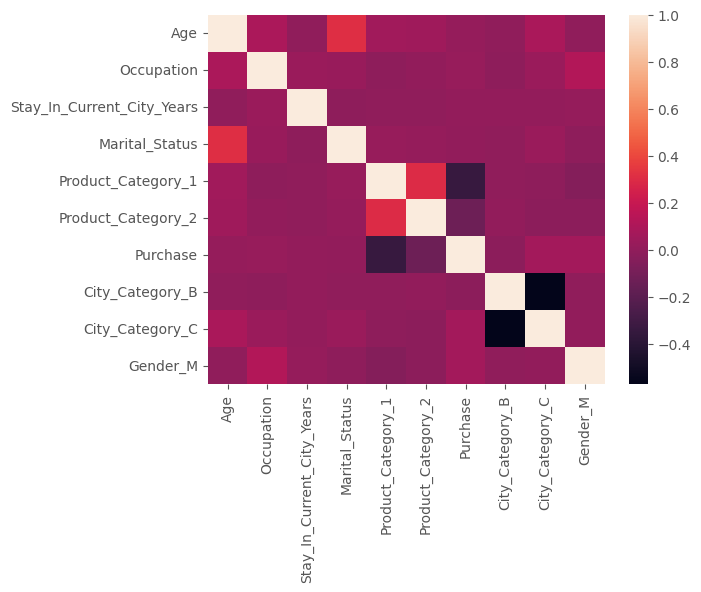

In [1359]:
sns.heatmap(df.corr())

# class of closed form 

In [1360]:
class LinearRegressionMatrixForm:
    def __init__(self):
        self.weights = None
    
    def fit(self, X_train, Y_train):
        # Add a column of ones for the intercept term
        X_train_with_intercept = np.c_[np.ones((X_train.shape[0], 1)), X_train]
        
        # Calculate the weights using the normal equation
        self.weights = np.linalg.inv(X_train_with_intercept.T @ X_train_with_intercept) @ X_train_with_intercept.T @ Y_train
    
    def predict(self, X_test):
        # Add a column of ones for the intercept term
        X_test_with_intercept = np.c_[np.ones((X_test.shape[0], 1)), X_test]
        
        # Predict using the calculated weights
        predictions = X_test_with_intercept.dot(self.weights)
        return predictions
    
    def calculate_mse(self, X, Y):
        predictions = self.predict(X)
        mse = np.mean((predictions - Y)**2)
        return mse


# class of gradient decent

In [1361]:
class LinearRegression_sc:
    def __init__(self, learning_rate, batch_size=256, epochs=50):
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.epochs = epochs
        self.theta = None
    
    def fit(self, X_train, Y_train):
        X_train_with_intercept = np.c_[np.ones((X_train.shape[0], 1)), X_train]
        self.theta = np.random.rand(X_train_with_intercept.shape[1], 1)
        
        for epoch in range(self.epochs):
            shuffled_indices = np.random.permutation(X_train.shape[0])
            X_shuffled = X_train_with_intercept[shuffled_indices]
            Y_shuffled = Y_train[shuffled_indices]
            
            for i in range(0, X_train.shape[0], self.batch_size):
                X_batch = X_shuffled[i:i+self.batch_size]
                Y_batch = Y_shuffled[i:i+self.batch_size]
                
                Y_pred_batch = X_batch.dot(self.theta)
                gradient = X_batch.T.dot(Y_pred_batch - Y_batch) / self.batch_size
                
                self.theta -= self.learning_rate * gradient

    
    def predict(self, X_test):
        X_test_with_intercept = np.c_[np.ones((X_test.shape[0], 1)), X_test]
        Y_pred = X_test_with_intercept.dot(self.theta)
        return Y_pred

    def calculate_mse(self, X, Y):
        Y_pred = self.predict(X)
        mse = np.mean((Y_pred - Y)**2)
        return mse


# with out feature scaling

In [1362]:
df

,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,City_Category_B,City_Category_C,Gender_M
0,17,10,2,0,3,6.0,8370,0,0,0
1,17,10,2,0,1,6.0,15200,0,0,0
2,17,10,2,0,12,6.0,1422,0,0,0
3,17,10,2,0,12,14.0,1057,0,0,0
4,56,16,4,0,8,14.0,7969,0,1,1
...,...,...,...,...,...,...,...,...,...,...
550063,55,13,1,1,20,2.0,368,1,0,1
550064,35,1,3,0,20,2.0,371,0,1,0
550065,35,15,4,1,20,2.0,137,1,0,0
550066,56,1,2,0,20,2.0,365,0,1,0


In [1363]:
X = df.iloc[:,[0,1,2,3,4,5,7,8,9]]
y = df.iloc[:,[6]]

In [1364]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [1365]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [1383]:
lin_close = LinearRegressionMatrixForm()
lin_close.fit(X_train,y_train)
lin_close.calculate_mse(X_test,y_test)

22081144.71063472

In [1384]:
lin_close.calculate_mse(X_train,y_train)

22047620.248698402

In [1381]:
lin_grade = LinearRegression_sc(1e-4)
lin_grade.fit(X_train,y_train)
lin_grade.calculate_mse(X_test,y_test)

25170954.186282326

In [1382]:
lin_grade.calculate_mse(X_train,y_train)

25244141.522507843

In [1368]:
mse_val_lr = []
for lr in ([1e-5,1e-4,1e-3,1e-2,1e-1,0.5]):
    lin_close = LinearRegression_sc(lr)
    lin_close.fit(X_train,y_train)
    mse_val_lr.append(lin_close.calculate_mse(X_test,y_test))
mse_df = pd.DataFrame()
mse_df['lr'] = pd.Series([1e-5,1e-4,1e-3,1e-2,1e-1,0.5])
mse_df['mse'] = pd.Series(mse_val_lr)

/var/folders/dt/nn2d_8jn65x8pk2905qm0yfc0000gn/T/ipykernel_36662/785763800.py:24: RuntimeWarning: invalid value encountered in subtract
  self.theta -= self.learning_rate * gradient


In [1369]:
mse_df

,lr,mse
0,0.00001,2.707129e+07
1,0.00010,2.433942e+07
2,0.00100,2.213294e+07
3,0.01000,NaN
4,0.10000,NaN
5,0.50000,NaN


<Axes: >

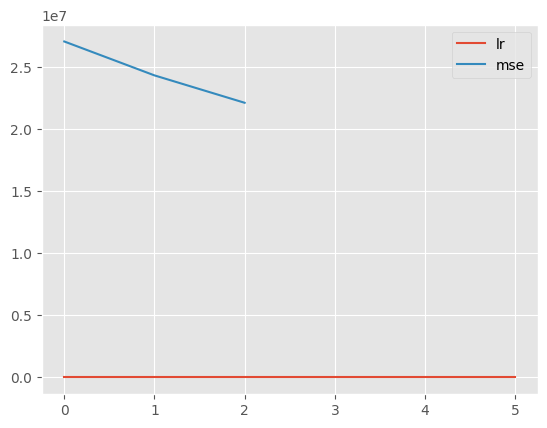

In [1370]:
mse_df.plot(kind='line')

## WITH FEATURE SCALING


In [1371]:
X = df.iloc[:,[0,1,2,3,4,5,7,8,9]]
y = df.iloc[:,[6]]


normalized_X = (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))

In [1372]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(normalized_X, y, test_size=0.33, random_state=42)

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

lin_close = LinearRegressionMatrixForm()
lin_close.fit(X_train,y_train)
mse_close = lin_close.calculate_mse(X_test,y_test)

lin_grad = LinearRegression_sc(1e-4)
lin_grad.fit(X_train,y_train)
lin_grad.calculate_mse(X_test,y_test)

mse_val_lr = []
for lr in ([1e-5,1e-4,1e-3,1e-2,1e-1,0.5]):
    lin_grade = LinearRegression_sc(lr)
    lin_grade.fit(X_train,y_train)
    mse_val_lr.append(lin_grade.calculate_mse(X_test,y_test))
mse_df_lr = pd.DataFrame()
mse_df_lr['lr'] = pd.Series([1e-5,1e-4,1e-3,1e-2,1e-1,0.5])
mse_df_lr['mse'] = pd.Series(mse_val_lr)

In [1403]:
mse_val_lr

[28844030.381238393,
 25170771.803878352,
 22097865.020270523,
 22081405.08608388,
 22087522.481585223,
 22150612.754260413]

In [1380]:
mse_close

22081144.71063472

In [1390]:
min(mse_df_lr['mse'])

22081405.08608388

In [1391]:
mse_df_lr

,lr,mse
0,0.00001,2.884403e+07
1,0.00010,2.517077e+07
2,0.00100,2.209787e+07
3,0.01000,2.208141e+07
4,0.10000,2.208752e+07
5,0.50000,2.215061e+07


In [1374]:
mse_df

,lr,mse
0,0.00001,2.707129e+07
1,0.00010,2.433942e+07
2,0.00100,2.213294e+07
3,0.01000,NaN
4,0.10000,NaN
5,0.50000,NaN


<Axes: >

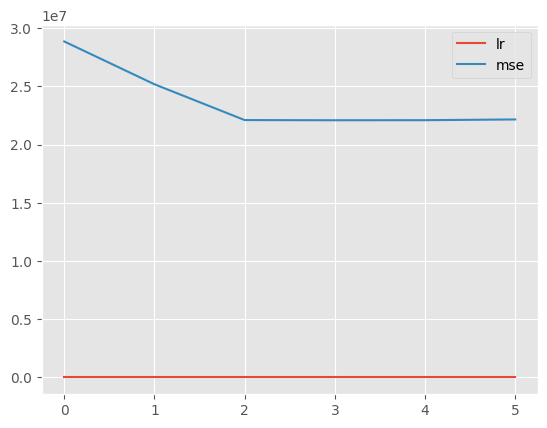

In [1396]:
mse_df_lr.plot()

In [1376]:
import numpy as np
import pandas as pd

class RidgeRegressionGradientDescent:
    def __init__(self, alpha=1.0, learning_rate=0.01, epochs=50):
        self.alpha = alpha
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
    
    def fit(self, X_train, Y_train):
        # Add a column of ones for the intercept term
        X_train_with_intercept = np.c_[np.ones((X_train.shape[0], 1)), X_train]
        
        num_samples, num_features = X_train_with_intercept.shape
        
        # Initialize weights to zeros
        self.weights = np.zeros((num_features, 1))
        
        for _ in range(self.epochs):
            # Calculate gradients with regularization term
            gradients = (1/num_samples) * X_train_with_intercept.T @ (X_train_with_intercept @ self.weights - Y_train) + 2 * self.alpha * self.weights
            
            # Update weights using gradient descent
            self.weights -= self.learning_rate * gradients
    
    def predict(self, X_test):
        # Add a column of ones for the intercept term
        X_test_with_intercept = np.c_[np.ones((X_test.shape[0], 1)), X_test]
        
        # Predict using the calculated weights
        predictions = X_test_with_intercept @ self.weights
        return predictions
    
    def calculate_mse(self, X, Y):
        predictions = self.predict(X)
        mse = np.mean((predictions - Y)**2)
        return mse


In [1377]:
rr = RidgeRegressionGradientDescent(1)
rr.fit(X_train,y_train)
rr.calculate_mse(X_test,y_test)

44097285.13342207

In [1378]:
alpha_list = np.arange(0,1.1,step=0.1)
rr_mse_list = []
for alpha in alpha_list:
    rr = RidgeRegressionGradientDescent(alpha)
    rr.fit(X_train,y_train)
    rr_mse_list.append(rr.calculate_mse(X_test,y_test))
mse_df_alpha = pd.DataFrame()
mse_df_alpha['alpha'] = pd.Series(alpha_list)
mse_df_alpha['mse'] = pd.Series(rr_mse_list)

In [1402]:
mse_df_alpha

,alpha,mse
0,0.0,3.165392e+07
1,0.1,3.274766e+07
2,0.2,3.390877e+07
3,0.3,3.512085e+07
4,0.4,3.636997e+07
5,0.5,3.764433e+07
6,0.6,3.893397e+07
7,0.7,4.023053e+07
8,0.8,4.152699e+07
9,0.9,4.281752e+07


<Axes: >

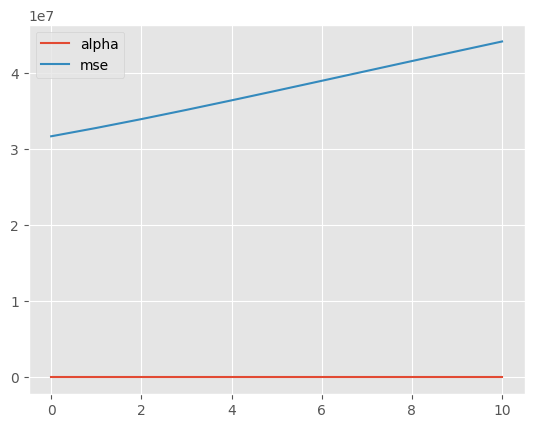

In [1379]:
mse_df_alpha.plot(kind='line')